# Logistic Regression

From [http://openonlinecourses.com/causalanalysis/Logistic%20Regression.asp](http://openonlinecourses.com/causalanalysis/Logistic%20Regression.asp).

## Question 1

In [1]:
import numpy as np

np.log(0.75 / 0.25)

1.0986122886681098

In [2]:
np.log(0.8 / 0.2)

1.3862943611198906

## Question 2

In [3]:
import pandas as pd

df = pd.read_csv('MFH.csv')
df.shape

(26585, 15)

In [4]:
df.head()

,MFH,death6m,bathing_365,bladder_365,bowelincontinence_365,dressing_365,eating_365,grooming_365,toileting_365,transferring_365,walking_365,gender,race,age,ID
0,1,0,0.78,0.48,0.58,0.75,0.56,0.720000,0.68,0.68,0.77,M,B,88.0,1
1,1,0,0.52,0.40,0.41,0.58,0.44,0.466667,0.62,0.51,0.49,M,W,64.0,2
2,1,0,0.65,0.46,0.48,0.67,0.56,0.610000,0.70,0.51,0.83,M,B,71.0,3
3,1,0,0.59,0.50,0.60,0.63,0.65,0.550000,0.64,0.47,0.60,M,W,71.0,4
4,1,0,0.55,0.52,0.46,0.58,0.48,0.640000,0.53,0.50,0.51,M,B,81.0,5


### Step 1: clean the data

In [5]:
import math

df['race_black'] = df['race'].apply(lambda r: 1 if r == 'B' else 0)
df['race_asian'] = df['race'].apply(lambda r: 1 if r == 'A' else 0)
df['race'] = df['race'].apply(lambda r: 1 if r == 'W' else 0)
df['gender'] = df['gender'].apply(lambda g: 1 if g == 'M' else 0)
df['age'] = df['age'].apply(lambda a: int(math.ceil(a / 10.0)) * 10 if pd.notna(a) else np.nan)
df.index = df['ID']
df = df.drop(columns=['ID'])
df.shape

(26585, 16)

In [6]:
df.head()

,MFH,death6m,bathing_365,bladder_365,bowelincontinence_365,dressing_365,eating_365,grooming_365,toileting_365,transferring_365,walking_365,gender,race,age,race_black,race_asian
ID,,,,,,,,,,,,,,,,
1,1,0,0.78,0.48,0.58,0.75,0.56,0.720000,0.68,0.68,0.77,1,0,90.0,1,0
2,1,0,0.52,0.40,0.41,0.58,0.44,0.466667,0.62,0.51,0.49,1,1,70.0,0,0
3,1,0,0.65,0.46,0.48,0.67,0.56,0.610000,0.70,0.51,0.83,1,0,80.0,1,0
4,1,0,0.59,0.50,0.60,0.63,0.65,0.550000,0.64,0.47,0.60,1,1,80.0,0,0
5,1,0,0.55,0.52,0.46,0.58,0.48,0.640000,0.53,0.50,0.51,1,0,90.0,1,0


### Step 2: Group the data by MFH,  disabilities, binary race variables, gender, and decades.  Call each combination a stratum.

In [7]:
strata_df = df.groupby(['MFH', 'age', 'race', 'gender']).agg(['sum', 'count'])[['death6m']].droplevel(0, axis=1)
strata_df

sum  count
MFH age   race gender            
0   30.0  0    0         0      3
               1         0      7
          1    0         0      3
               1         0     16
    40.0  0    0         0      8
               1         0     38
          1    0         0     16
               1         0     62
    50.0  0    0         0     34
               1         0    222
          1    0         0     65
               1         0    469
    60.0  0    0         0     75
               1         0   1059
          1    0         0    174
               1         0   2458
    70.0  0    0         0     37
               1         0   1775
          1    0         0    153
               1         9   3988
    80.0  0    0         0     21
               1         1   1349
          1    0         0    117
               1        15   4155
    90.0  0    0         0     19
               1         0   1378
          1    0         0    116
               1        10   4874
    100.0 0    0         0      5
               1         0    188
          1    0         0     30
               1         0    712
    110.0 1    1         0      5
1   40.0  1    1         0      9
    50.0  0    0         0      2
               1         0      7
          1    0         0      1
               1         0     32
    60.0  0    0         0      1
               1         0    130
          1    0         0     38
               1         0    202
    70.0  0    0         0     17
               1         0    221
          1    0         0     36
               1        16    740
    80.0  0    0         0      1
               1         0    131
          1    0         0     26
               1         8    345
    90.0  0    0         0      6
               1        16    223
          1    0         0     16
               1         8    551
    100.0 0    1         0     80
          1    0         0      5
               1        24    130
    110.0 0    1         0      1

### Step 3: Calculate the probability of survival in each strata.  

In [8]:
strata_df['p_survival'] = 1 - strata_df['sum'] / strata_df['count']
strata_df

sum  count  p_survival
MFH age   race gender                        
0   30.0  0    0         0      3    1.000000
               1         0      7    1.000000
          1    0         0      3    1.000000
               1         0     16    1.000000
    40.0  0    0         0      8    1.000000
               1         0     38    1.000000
          1    0         0     16    1.000000
               1         0     62    1.000000
    50.0  0    0         0     34    1.000000
               1         0    222    1.000000
          1    0         0     65    1.000000
               1         0    469    1.000000
    60.0  0    0         0     75    1.000000
               1         0   1059    1.000000
          1    0         0    174    1.000000
               1         0   2458    1.000000
    70.0  0    0         0     37    1.000000
               1         0   1775    1.000000
          1    0         0    153    1.000000
               1         9   3988    0.997743
    80.0  0    0         0     21    1.000000
               1         1   1349    0.999259
          1    0         0    117    1.000000
               1        15   4155    0.996390
    90.0  0    0         0     19    1.000000
               1         0   1378    1.000000
          1    0         0    116    1.000000
               1        10   4874    0.997948
    100.0 0    0         0      5    1.000000
               1         0    188    1.000000
          1    0         0     30    1.000000
               1         0    712    1.000000
    110.0 1    1         0      5    1.000000
1   40.0  1    1         0      9    1.000000
    50.0  0    0         0      2    1.000000
               1         0      7    1.000000
          1    0         0      1    1.000000
               1         0     32    1.000000
    60.0  0    0         0      1    1.000000
               1         0    130    1.000000
          1    0         0     38    1.000000
               1         0    202    1.000000
    70.0  0    0         0     17    1.000000
               1         0    221    1.000000
          1    0         0     36    1.000000
               1        16    740    0.978378
    80.0  0    0         0      1    1.000000
               1         0    131    1.000000
          1    0         0     26    1.000000
               1         8    345    0.976812
    90.0  0    0         0      6    1.000000
               1        16    223    0.928251
          1    0         0     16    1.000000
               1         8    551    0.985481
    100.0 0    1         0     80    1.000000
          1    0         0      5    1.000000
               1        24    130    0.815385
    110.0 0    1         0      1    1.000000

### Step 4: Create a regression model to explain the relationship among the variables and survival. 

In [9]:
X = df.dropna()
X, y = X[[c for c in df.columns if c not in ['death6m', 'race']]], X['death6m']

X.shape, y.shape

((26582, 14), (26582,))

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10_000)
model.fit(X, y)

model.intercept_[0], model.coef_[0]

(-11.443082734937468,
 array([ 2.7211841 ,  0.68155885, -1.70847285,  0.82988134, -0.45723334,
        -0.29805954,  0.54809379, -0.56572414, -0.77668465, -0.81084873,
         1.19314863,  0.06323784, -0.12850235, -0.98576755]))

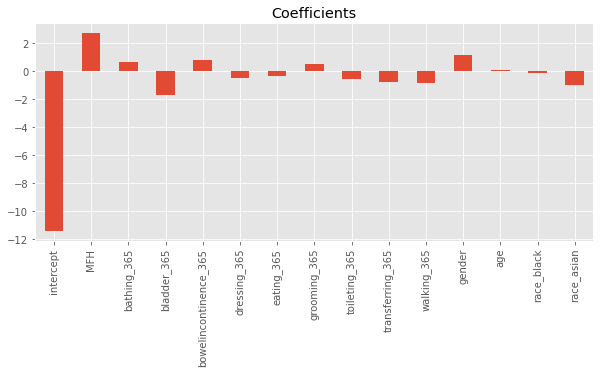

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

s = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=['intercept'] + list(X.columns))
_ = s.plot(kind='bar', title='Coefficients', figsize=(10, 4))

### Step 5: Explain the probability of survival for a strata with the highest probability of survival.  

In [12]:
strata_df.sort_values(['p_survival']).head(1)

,,,,sum,count,p_survival
MFH,age,race,gender,,,
1,100.0,1,1,24,130,0.815385


It's probably more interesting to look at a strata with the lowest probability of survival. MFH participation and being male have harmful effects on death within 6 months.

### Step 6: List the top 4 predictors of survival

In [13]:
s = pd.Series(model.coef_[0], index=X.columns)

np.abs(s).sort_values().tail(4)

race_asian     0.985768
gender         1.193149
bladder_365    1.708473
MFH            2.721184
dtype: float64

### Step 7: Describe, in English, if the MFH program contributes to survival. 

## Question 3

In [15]:
df = pd.read_excel('Expected LOS in 10 Diseases.xlsx')
df.shape

(6657, 11)

In [16]:
df.head()

,Hypertension,Anemia,Diabetes,HIV,Stomach Cancer,Lung Cancer,Myocardial Infarction,Heart Failure,Metastetic Cancer,Cared for by Dr Smith,LOS
0,0,0,0,0,0,0,0,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,1,6
3,1,0,0,0,0,0,0,0,0,1,6
4,0,1,0,0,0,0,0,0,0,0,3


### Does Dr. Smith see a different set of patients than his peer group? 

Dr. Smith seems to see patients with smaller probability of hearth failure and metastatic cancer, as well as shorter average LOS.

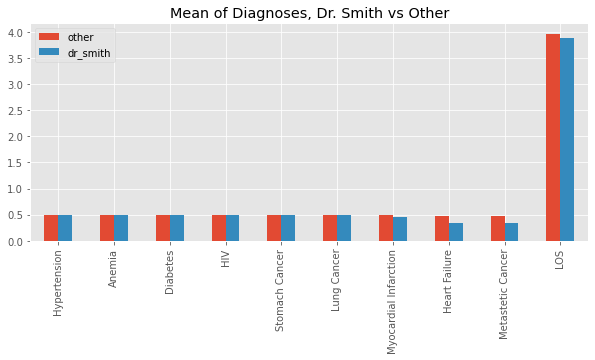

In [24]:
_ = pd.DataFrame({
    'other': df[df['Cared for by Dr Smith'] == 0][[c for c in df if c != 'Cared for by Dr Smith']].mean(),
    'dr_smith': df[df['Cared for by Dr Smith'] == 1][[c for c in df if c != 'Cared for by Dr Smith']].mean()
}).plot(kind='bar', figsize=(10, 4), title='Mean of Diagnoses, Dr. Smith vs Other')

### In particular, what is the probability of patients being seen by Dr. Smith.

In [26]:
df['Cared for by Dr Smith'].value_counts() / df.shape[0]

1    0.601923
0    0.398077
Name: Cared for by Dr Smith, dtype: float64

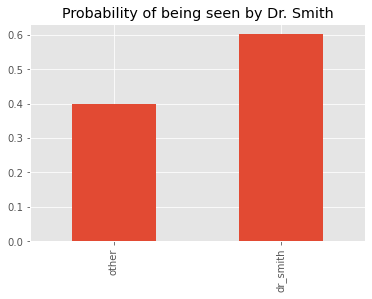

In [32]:
s = (df['Cared for by Dr Smith'].value_counts() / df.shape[0]).sort_values()
s.index = ['other', 'dr_smith']
ax = s.plot(kind='bar', title='Probability of being seen by Dr. Smith')

### Regress the choice of provider on the 9 diagnoses provided.

In [35]:
X = df.dropna()
X, y = X[[c for c in X.columns if c != 'Cared for by Dr Smith']], X['Cared for by Dr Smith']

X.shape, y.shape

((6657, 10), (6657,))

In [36]:
model = LogisticRegression(max_iter=10_000)
model.fit(X, y)

model.intercept_[0], model.coef_[0]

(0.9358835452959025,
 array([ 0.00571707, -0.01010148,  0.00090886,  0.01242404,  0.01320936,
        -0.01516287, -0.08402105, -0.52431467, -0.52274763, -0.01538519]))

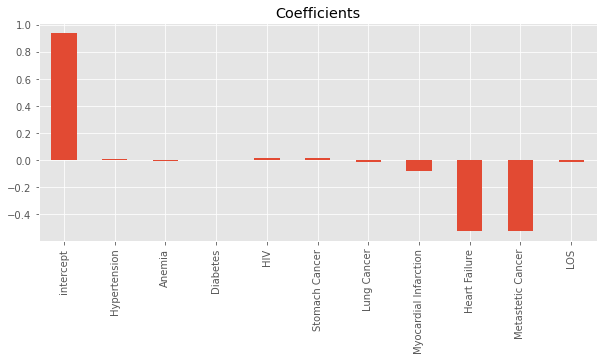

In [37]:
s = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=['intercept'] + list(X.columns))
_ = s.plot(kind='bar', title='Coefficients', figsize=(10, 4))

## Question 4

In [142]:
fields = [
    'ID', 'age', 'gender', 'num_assessments', 
    'num_days_followed', 'days_since_first_assessment', 
    'days_to_last_assessment', 'eat', 'transfer', 'groom', 
    'toilet', 'bathe', 'walk', 'dress', 'bowel', 
    'urine', 'is_dead', 'assessment_number'
]

df = pd.read_csv('Assessments.txt', sep='\t', names=fields)
df.index = pd.MultiIndex.from_tuples([(i, idx) for i, idx in enumerate(df['ID'])], names=['row', 'ID'])
df['gender'] = df['gender'].apply(lambda g: 1 if 'M' == g else 0)
df = df.drop(columns=['ID'])
df = df[df['age'] > 0]
df['age'] = df['age'].apply(lambda a: int(math.ceil(a / 10.0)) * 10 if pd.notna(a) else np.nan)

df.shape

(1306401, 17)

In [143]:
df.head()

,,age,gender,num_assessments,num_days_followed,days_since_first_assessment,days_to_last_assessment,eat,transfer,groom,toilet,bathe,walk,dress,bowel,urine,is_dead,assessment_number
row,ID,,,,,,,,,,,,,,,,,
0,1,70,1,9,915,0,915,0,0,0,0,0,1,0,0,0,0,1
1,1,70,1,9,915,7,908,0,0,0,0,0,1,0,0,0,0,2
2,1,70,1,9,915,18,897,0,0,0,0,0,1,0,0,0,0,3
3,1,70,1,9,915,238,677,0,0,0,0,0,1,0,0,0,0,4
4,1,70,1,9,915,311,604,0,0,0,0,0,1,0,0,0,0,5


### Step 1: Read the data, making sure all entries are numbers.

In [144]:
df.dtypes

age                            int64
gender                         int64
num_assessments                int64
num_days_followed              int64
days_since_first_assessment    int64
days_to_last_assessment        int64
eat                            int64
transfer                       int64
groom                          int64
toilet                         int64
bathe                          int64
walk                           int64
dress                          int64
bowel                          int64
urine                          int64
is_dead                        int64
assessment_number              int64
dtype: object

### Step 2: Clean the data, removing impossible situations

### Step 3: Remove irrelevant cases

In [145]:
s = df.groupby(['ID']).agg('count')[['age']].rename(columns={'age': 'n'})['n']
s = s[s > 1]
ids = set(s.index)

len(ids)

254725

In [146]:
df = df[df.index.isin(ids, level=1)]
df.shape

(1306401, 17)

### Step 4: For each assessment, remove all assessments that are more than 6 months older.

In [147]:
is_valid_row = lambda d: d <= 30.437 * 6

df = df[df['days_since_first_assessment'].apply(is_valid_row)]
df.shape

(677990, 17)

### Step 5: Organize age at current admission into a binary variable above or below the average age at current assessment

In [148]:
avg_age = df['age'].mean()
df['age_at_admission'] = df['age'].apply(lambda a: 1 if a > avg_age else 0)

In [149]:
df.head()

,,age,gender,num_assessments,num_days_followed,days_since_first_assessment,days_to_last_assessment,eat,transfer,groom,toilet,bathe,walk,dress,bowel,urine,is_dead,assessment_number,age_at_admission
row,ID,,,,,,,,,,,,,,,,,,
0,1,70,1,9,915,0,915,0,0,0,0,0,1,0,0,0,0,1,0
1,1,70,1,9,915,7,908,0,0,0,0,0,1,0,0,0,0,2,0
2,1,70,1,9,915,18,897,0,0,0,0,0,1,0,0,0,0,3,0
9,10,60,1,4,235,0,235,0,0,0,0,0,0,0,0,0,0,1,0
10,10,60,1,4,235,74,161,0,0,0,0,0,0,0,0,0,0,2,0


### Step 6: Calculate a new variable for each assessment that checks if the person would have an eating in the next 6 months. 

In [ ]:
def has_eating6m(i, r):
    days_since_first_assessment = r['days_since_first_assessment']
    
    row, idx = i
    d = df[df.index.isin([idx], level=1)].sort_values(['days_since_first_assessment'])
    d = d[d.index.get_level_values('row') > row]
    if d.shape[0] < 1:
        return 0
    
    d['time'] = d['days_since_first_assessment'] - days_since_first_assessment
    d['within6m'] = d['time'].apply(lambda t: t <= 30.437 * 6)
    d = d[d['within6m'] == True]
    if d.shape[0] < 1:
        return 0
    
    d = d[d['eat'] == 1]
    if d.shape[0] < 1:
        return 0
        
    return 1
    
df['eating6m'] = [has_eating6m(i, r) for i, r in df.iterrows()]

In [ ]:
df.shape

In [ ]:
df.head()

### Step 7: Group the data based on current disabilities, gender, and age.  Count the number of residents who died within 6 months of assessment for combination of disabilities, gender and age. 

In [157]:
df.groupby(['age', 'gender']).agg('sum')['is_dead']

age  gender
10   0             0
     1             5
20   0             1
     1             6
30   0             7
     1            31
40   0            14
     1           106
50   0            91
     1          1239
60   0           285
     1          9092
70   0           264
     1         14984
80   0           318
     1         21414
90   0           495
     1         21778
100  0            99
     1          2895
110  0             4
     1            34
Name: is_dead, dtype: int64

### Step 8: Use ordinary regression to regress the Logit of odds of dying on various current disabilities, age, gender, and pair wise interactions of these variables.

In [154]:
exclude = [
    'is_dead', 'assessment_number', 'age_at_admission',
    'num_assessments',
    'num_days_followed',
    'days_since_first_assessment',
    'days_to_last_assessment'
]
X = df[[c for c in df.columns if c not in exclude]]
y = df['is_dead']

X.shape, y.shape

((677990, 11), (677990,))

In [155]:
model = LogisticRegression(max_iter=10_000)
model.fit(X, y)

model.intercept_[0], model.coef_[0]

(-5.275865194143612,
 array([ 0.06023654,  0.17356623, -5.80366529, -1.70320604, -7.05977293,
        -4.39979383, -8.84228763, -7.07590138, -4.23445929, -3.02565372,
        -4.59205156]))

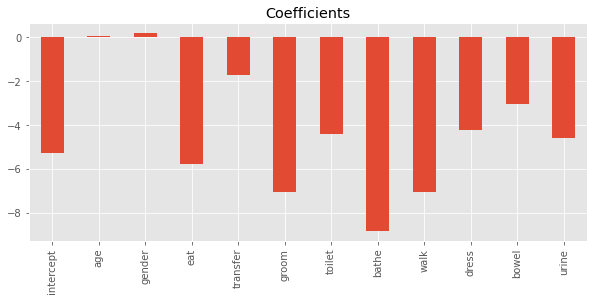

In [156]:
s = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=['intercept'] + list(X.columns))
_ = s.plot(kind='bar', title='Coefficients', figsize=(10, 4))

### Step 9: Identify what is the Markov Blanket of feeding disability in 6 months.  

In [174]:
exclude = [
    'is_dead', 'assessment_number', 'age_at_admission',
    'num_assessments',
    'num_days_followed',
    'days_since_first_assessment',
    'days_to_last_assessment',
    'eat'
]
X = df[[c for c in df.columns if c not in exclude]]
y = df['eat']

X.shape, y.shape

((677990, 10), (677990,))

In [176]:
model = LogisticRegression(penalty='l1', C=0.5, solver='saga', max_iter=10_000)
model.fit(X, y)

model.intercept_[0], model.coef_[0]

(-4.587234291991979,
 array([-0.00465351,  0.14012549,  1.34143126,  0.8148122 ,  0.8834447 ,
        -0.06799627,  0.15142027,  1.29378715,  1.00762508,  0.00224882]))

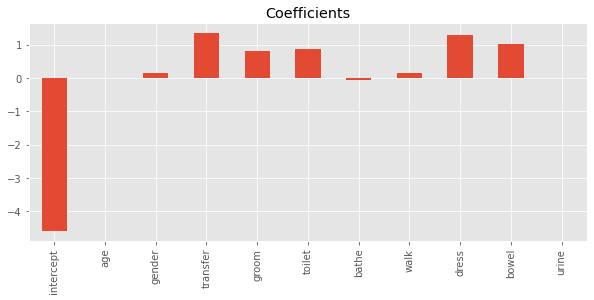

In [177]:
s = pd.Series([model.intercept_[0]] + list(model.coef_[0]), index=['intercept'] + list(X.columns))
_ = s.plot(kind='bar', title='Coefficients', figsize=(10, 4))

## Question 5

Repeat question 4 but now predict 6 month likelihood of first occurrence of walking disorders instead of death.